In [17]:
import numpy as np
import pandas as pd
from datasets import load_dataset
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
data = load_dataset('mnist')

README.md:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [6]:
data['train']

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})

In [8]:
subset = data['train']

In [10]:
subset

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})

In [11]:
# convert to flattened numpy array
X = np.array([np.array(example["image"]).flatten() for example in subset])
print("Data shape:", X.shape) 

Data shape: (60000, 784)


In [12]:
# normalize
X = X/255.0 

In [31]:
n_comp = 80
pca = PCA(n_components=0.9, svd_solver='full')
pca.fit(X)

PCA(n_components=0.9, svd_solver='full')

In [32]:
components = pca.components_
print(components.shape)

(87, 784)


In [33]:
X_pca = pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)
print(explained_var)

[0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498  0.5092417  0.52947161
 0.54662979 0.56355091 0.57933732 0.59416685 0.60741246 0.62018143
 0.63205406 0.6435809  0.65424256 0.66430969 0.67384542 0.68297086
 0.69180491 0.7001981  0.70832389 0.71618755 0.72363488 0.73054347
 0.73712441 0.74360589 0.74963204 0.75549786 0.76119807 0.76663435
 0.77169222 0.7765708  0.7813851  0.78610776 0.79067523 0.79512359
 0.7993086  0.80329076 0.8071405  0.81089154 0.81451162 0.81802754
 0.82142812 0.82464686 0.82783703 0.83096508 0.83392491 0.83681446
 0.83965576 0.84237012 0.84506533 0.84765006 0.85018776 0.85263557
 0.85504063 0.85743326 0.85973735 0.86195267 0.86408988 0.86616213
 0.86819256 0.87016038 0.87208891 0.87397523 0.875845   0.87765583
 0.87943146 0.88118044 0.88283802 0.88447696 0.88609158 0.88764274
 0.88911887 0.89055063 0.89197158 0.89338311 0.89478485 0.89614222
 0.89748069 0.89880465 0.90010622]


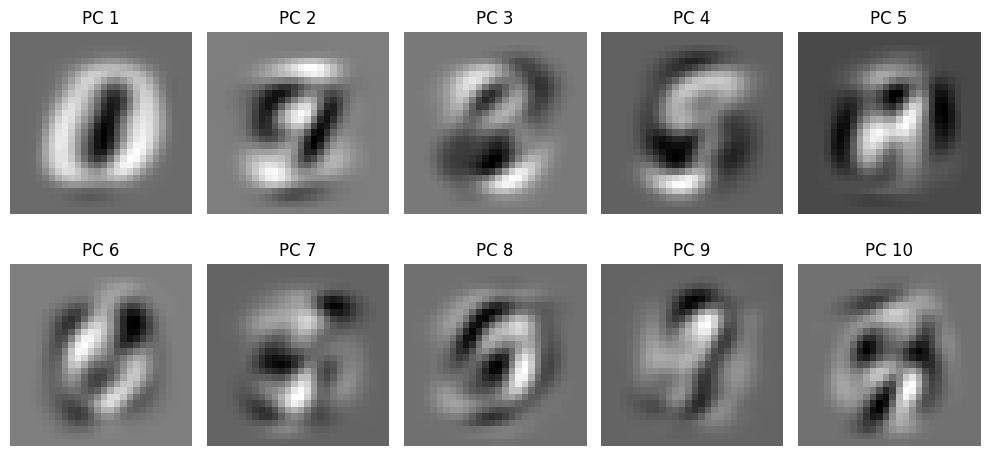

In [34]:
plt.figure(figsize=(10,5))
for i,component in enumerate(components[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(component.reshape(28,28),cmap='gray')
    plt.title(f"PC {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [39]:
index = 1
x_original = X[index]
x_reconstr = pca.inverse_transform(X_pca[index])

In [40]:
mse = np.mean((x_original - x_reconstr) ** 2)
print(f"Reconstruction MSE for image index {index}: {mse:.4f}")

Reconstruction MSE for image index 1: 0.0051


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

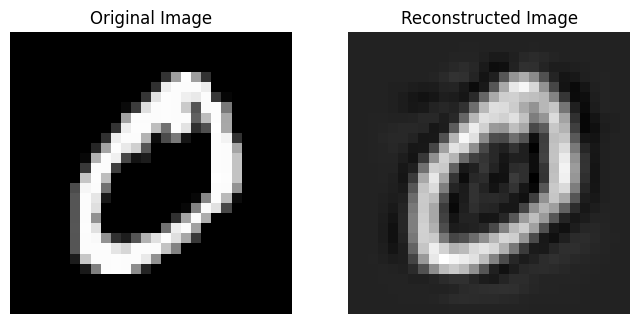

In [42]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(x_original.reshape(28,28),cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(x_reconstr.reshape(28,28),cmap='gray')
plt.title("Reconstructed Image")
plt.axis("off")